In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [4]:
np.random.seed(73)

In [1]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [24]:
x_sigmoid = np.linspace(-9, 9, 100)
y_sigmoid = sigmoid(x_sigmoid)

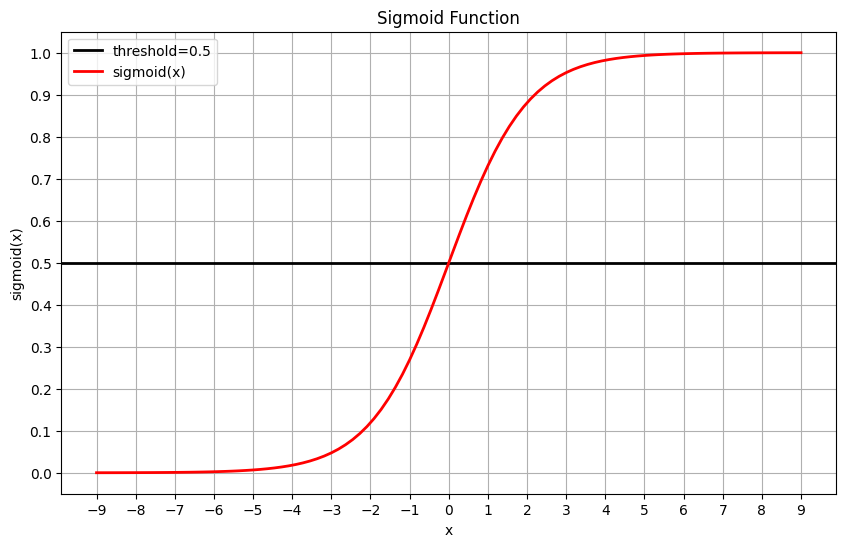

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Sigmoid Function')
ax.set_xlabel('x')
ax.set_ylabel('sigmoid(x)')
ax.grid(True)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.axhline(0.5, color='black', lw=2, label='threshold=0.5')
ax.plot(x_sigmoid, y_sigmoid, label='sigmoid(x)', lw=2, color='red')
plt.legend()